In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1. Data cleaning

In [6]:
# Non numeric columns

non_num_cols = set(lead_df) - set(lead_df.describe().columns)
non_num_cols

{'A free copy of Mastering The Interview',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Country',
 'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'Last Activity',
 'Last Notable Activity',
 'Lead Origin',
 'Lead Profile',
 'Lead Quality',
 'Lead Source',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Prospect ID',
 'Receive More Updates About Our Courses',
 'Search',
 'Specialization',
 'Tags',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'X Education Forums'}

###### Validating data present in each non-numeric columns

In [7]:
# Calculate the percentage spread of unique values in each column.
for col in non_num_cols:
    print(round(100*lead_df[col].value_counts(dropna=False)/len(lead_df[col]),2))
    print('======================================================================')

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
28a71a9f-81bc-4b34-951c-a8f3b02ce3ed    0.01
74878c4b-50d7-4a13-9ec2-754360fb5dd0    0.01
769397c5-fe52-4c0f-9107-94d830a41c7f    0.01
a5c5f80a-7fb1-479c-961f-d958aafddf4e    0.01
373a442f-e580-4190-9568-769bc4d2cc99    0.01
                                        ... 
a8fee89b-ec8b-460e-9029-2c71c20d4da6    0.01
f415701e-9b89-4312-b4fd-138de0f8fd67    0.01
95c550a3-fb83-4227-8881-9a97b71251e3    0.01
5ea44303-31c8-4405-8ce1-223a438d35ab    0.01
e76174f4-6b26-45c3-b34f-882776fee176    0.01
Name: Prospect ID, Length: 9240, dtype: float64
Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead              

###### Observations

- Below columns are having only one value which will not be useful for analysis.
    - 'Update me on Supply Chain Content',
    - 'Magazine', 
    - 'Receive More Updates About Our Courses',
    - 'Get updates on DM Content', 
    - 'I agree to pay the amount through cheque'

    
- Below columns are having one value more than 99%.
    - 'Do Not Call', 
    - 'Search', 
    - 'X Education Forums',
    - 'Newspaper Article',
    - 'Newspaper'
    - 'Digital Advertisement',
    - 'Through Recommendations'.


- The Column 'Country' is having labels as 'Asia/Pacific Region' and 'Unknown'.

- The column 'Lead Source' is having the labels as 'Google', 'google'. These are labeled different due to case mismatch. 


###### Coverting categorical label values to lower case format

In [8]:
# Using the string function 'lower()' to convert the each categorical lable into lower case.
for col in non_num_cols:
    lead_df[col] = lead_df[col].apply(lambda x:x.lower() if type(x) is str else x)

In [9]:
# Validating each value present in the dataset.
for col in non_num_cols:
    print(round(100*lead_df[col].value_counts(dropna=False)/len(lead_df[col]),2))

landing page submission    52.88
api                        38.74
lead add form               7.77
lead import                 0.60
quick add form              0.01
Name: Lead Origin, dtype: float64
no    100.0
Name: I agree to pay the amount through cheque, dtype: float64
28a71a9f-81bc-4b34-951c-a8f3b02ce3ed    0.01
74878c4b-50d7-4a13-9ec2-754360fb5dd0    0.01
769397c5-fe52-4c0f-9107-94d830a41c7f    0.01
a5c5f80a-7fb1-479c-961f-d958aafddf4e    0.01
373a442f-e580-4190-9568-769bc4d2cc99    0.01
                                        ... 
a8fee89b-ec8b-460e-9029-2c71c20d4da6    0.01
f415701e-9b89-4312-b4fd-138de0f8fd67    0.01
95c550a3-fb83-4227-8881-9a97b71251e3    0.01
5ea44303-31c8-4405-8ce1-223a438d35ab    0.01
e76174f4-6b26-45c3-b34f-882776fee176    0.01
Name: Prospect ID, Length: 9240, dtype: float64
email opened                    37.20
sms sent                        29.71
olark chat conversation         10.53
page visited on website          6.93
converted to lead              

- All categorical values are converted in to lower case.

###### Handling the categorical level 'select'

- We have many categorical columns are having the value as 'select'.
- 'select' is the default value for the columns which are having drop down list in the submission form.
- So, we can convert the 'select' as 'Nan' in the dataframe.

In [10]:
lead_df = lead_df.replace('select',np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,low in relevance,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,not sure,no,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [11]:
(lead_df[non_num_cols]=='select').sum()

Lead Origin                                      0
I agree to pay the amount through cheque         0
Prospect ID                                      0
Last Activity                                    0
Do Not Email                                     0
Asymmetrique Profile Index                       0
How did you hear about X Education               0
Newspaper                                        0
Do Not Call                                      0
What is your current occupation                  0
Receive More Updates About Our Courses           0
Lead Quality                                     0
Digital Advertisement                            0
Country                                          0
What matters most to you in choosing a course    0
Magazine                                         0
Lead Source                                      0
Tags                                             0
Search                                           0
A free copy of Mastering The In

- In the categorical columns, value 'select' are replaced with 'NaN'

###### Removing columns

- Higly skewed columns (one value more than 99%)
- Colums which are having only one value

In [12]:
Cols_to_remove = ['Update me on Supply Chain Content','Magazine','Receive More Updates About Our Courses',
                  'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call','Search',
                  'X Education Forums','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations']

In [13]:
lead_df.drop(Cols_to_remove,axis=1,inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,0,0.0,0,0.0,page visited on website,NaN,NaN,NaN,unemployed,better career prospects,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


Lets validate unique numeric columns

In [14]:
num_cols = lead_df.describe().columns
num_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
# Calculate the percentage spread of unique values in each column.
for col in num_cols:
    print(round(100*lead_df[col].value_counts(dropna=False)/len(lead_df[col]),2))

655360    0.01
604698    0.01
621242    0.01
619195    0.01
600768    0.01
          ... 
593502    0.01
636228    0.01
648518    0.01
580937    0.01
608255    0.01
Name: Lead Number, Length: 9240, dtype: float64
0    61.46
1    38.54
Name: Converted, dtype: float64
0.0      23.69
2.0      18.18
3.0      14.13
4.0      12.12
5.0       8.47
6.0       5.04
1.0       4.27
7.0       3.34
8.0       2.42
9.0       1.77
NaN       1.48
10.0      1.23
11.0      0.93
13.0      0.52
12.0      0.49
14.0      0.39
16.0      0.23
15.0      0.19
17.0      0.17
18.0      0.16
20.0      0.13
19.0      0.10
23.0      0.06
21.0      0.06
24.0      0.05
27.0      0.05
25.0      0.05
22.0      0.03
28.0      0.02
29.0      0.02
26.0      0.02
141.0     0.01
41.0      0.01
55.0      0.01
115.0     0.01
32.0      0.01
54.0      0.01
42.0      0.01
251.0     0.01
74.0      0.01
43.0      0.01
30.0      0.01
Name: TotalVisits, dtype: float64
0       23.73
60       0.21
127      0.19
75       0.19
74       0.19

###### Observation

- Numerical columns doesn't have single value with high percentage or not skewed.

#### Handling missing values
###### Row wise missing percentage

In [16]:
sum(round(100*lead_df.isnull().sum(axis=1)/len(lead_df.columns),2)>70)

0

There is no row having missing values more than 70%

###### Column wise missing percentage

In [17]:
# Checking for the missing values

round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Prospect I

#### Observations
- We could see that many columns are having missing values. If a column have missing values more than 40%, it will be no use.
- Remove the columns which are having missing values more than 40%

In [18]:
# Columns having missing value more than 40%

Cols_to_remove = (100*lead_df.isnull().sum(axis=0)/len(lead_df))[(100*lead_df.isnull().sum(axis=0)/len(lead_df))>40].index
Cols_to_remove

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [19]:
lead_df.drop(Cols_to_remove,axis=1,inplace=True)

In [20]:
round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: flo

In [21]:
# Columns which are having missing values lesser than 2%

cols_to_remove = lead_df.isnull().sum(axis=0)[(100*lead_df.isnull().sum(axis=0)/len(lead_df)<2) & (100*lead_df.isnull().sum(axis=0)/len(lead_df)>0)].index
cols_to_remove

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], dtype='object')

In [22]:
# Removing the rows which are having null values based on the above listed columns.

for col in cols_to_remove:
    rows_remove = lead_df[lead_df[col].isnull()].index
    lead_df.drop(rows_remove,inplace=True)

In [23]:
lead_df.shape

(9074, 18)

Currenlty we have 9074 rows and 18 columns

In [24]:
# Calculate the missing values for each columns
round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

City                                             39.40
Tags                                             36.67
Specialization                                   36.17
What matters most to you in choosing a course    29.78
What is your current occupation                  29.57
Country                                          25.30
Prospect ID                                       0.00
Lead Number                                       0.00
A free copy of Mastering The Interview            0.00
Last Activity                                     0.00
Page Views Per Visit                              0.00
Total Time Spent on Website                       0.00
TotalVisits                                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Source                                       0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: flo

##### Observations

- We still have 6 columns with missing values. Removing the rows will lead us to loss of huge data.
- Lets validate each column and impute the missing values or remove the column.

###### Column - 'City' 

In [25]:
round(100*lead_df['City'].value_counts(dropna=False)/len(lead_df),2)

NaN                            39.40
mumbai                         35.01
thane & outskirts               8.21
other cities                    7.49
other cities of maharashtra     4.92
other metro cities              4.15
tier ii cities                  0.82
Name: City, dtype: float64

- Replace the missing values in the column 'City' as 'unknown'.
- Also, we can replace 'Other cities', 'other cities of maharashtra','other metro cities' and 'tier ii cities' as 'others'

In [26]:
lead_df['City'].fillna('unknown',inplace =True)

lead_df['City'].replace(['other cities','other cities of maharashtra','other metro cities','tier ii cities'],'others',inplace=True)

In [27]:
#Check whether the values replaced properly
round(100*lead_df['City'].value_counts(dropna=False)/len(lead_df),2)

unknown              39.40
mumbai               35.01
others               17.38
thane & outskirts     8.21
Name: City, dtype: float64

###### Column - 'Country'

In [28]:
round(100*lead_df['Country'].value_counts(dropna=False)/len(lead_df),2)

india                   71.53
NaN                     25.30
united states            0.76
united arab emirates     0.58
singapore                0.26
saudi arabia             0.23
united kingdom           0.17
australia                0.14
qatar                    0.11
bahrain                  0.08
hong kong                0.08
france                   0.07
oman                     0.07
unknown                  0.06
kuwait                   0.04
canada                   0.04
germany                  0.04
south africa             0.04
nigeria                  0.04
sweden                   0.03
bangladesh               0.02
uganda                   0.02
asia/pacific region      0.02
ghana                    0.02
belgium                  0.02
italy                    0.02
philippines              0.02
china                    0.02
netherlands              0.02
indonesia                0.01
denmark                  0.01
liberia                  0.01
tanzania                 0.01
switzerlan

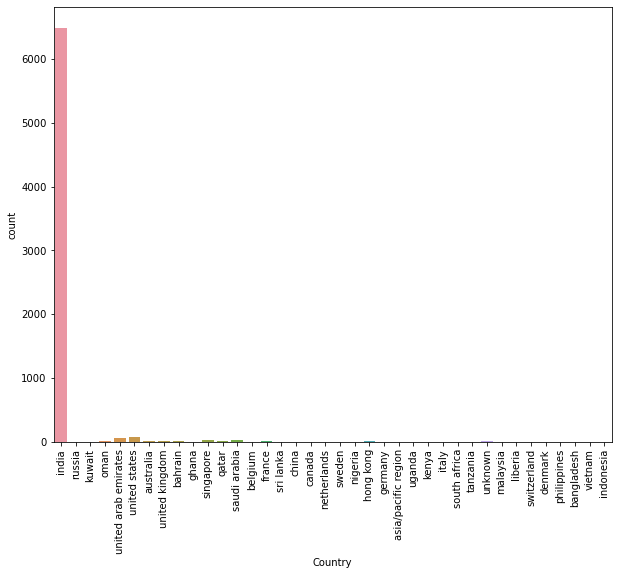

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df['Country'])
plt.xticks(rotation=90)
plt.show()

In the column 'Country' name 'India' have the more counts and the data is highly skewed.
So, we can drop this column.

In [30]:
lead_df.drop('Country',axis=1,inplace=True)

In [31]:
# Calculate the missing values for each columns
round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

Tags                                             36.67
Specialization                                   36.17
What matters most to you in choosing a course    29.78
What is your current occupation                  29.57
Prospect ID                                       0.00
Last Activity                                     0.00
A free copy of Mastering The Interview            0.00
City                                              0.00
Page Views Per Visit                              0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
TotalVisits                                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Source                                       0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: float64

###### Column - 'Specialization'

In [32]:
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3282
finance management                    959
human resource management             837
marketing management                  823
operations management                 499
business administration               399
it projects management                366
supply chain management               346
banking, investment and insurance     335
travel and tourism                    202
media and advertising                 202
international business                176
healthcare management                 156
e-commerce                            111
hospitality management                111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

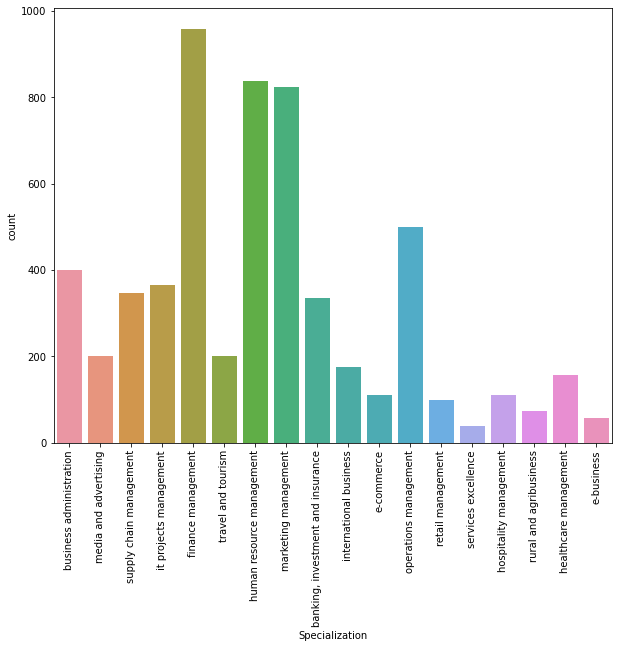

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In the column 'Specialization', we can see that all values have decent counts. So, we can replace missing values as 'other'

In [34]:
lead_df['Specialization'].fillna('other',inplace=True)

In [35]:
# Check whether the missing values replaced properly
lead_df['Specialization'].value_counts(dropna=False)

other                                3282
finance management                    959
human resource management             837
marketing management                  823
operations management                 499
business administration               399
it projects management                366
supply chain management               346
banking, investment and insurance     335
travel and tourism                    202
media and advertising                 202
international business                176
healthcare management                 156
e-commerce                            111
hospitality management                111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

###### Column - 'What matters most to you in choosing a course'

In [36]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6370
NaN                          2702
flexibility & convenience       1
other                           1
Name: What matters most to you in choosing a course, dtype: int64

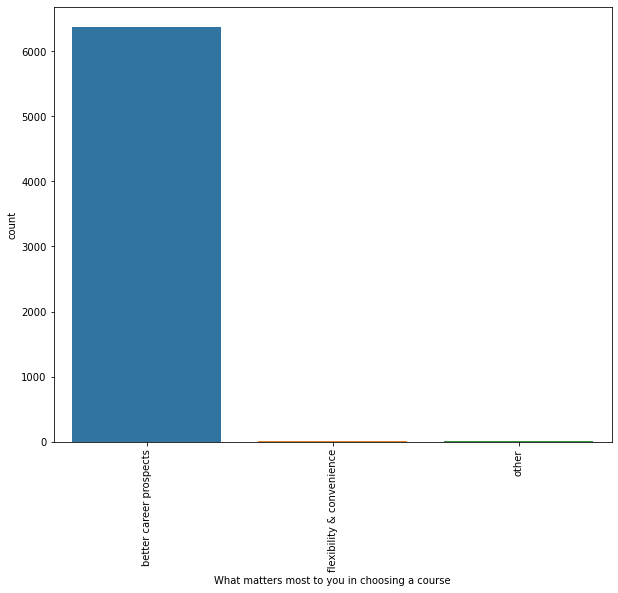

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [38]:
# Lets see the count in percentage

round(100*lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)/len(lead_df),2)

better career prospects      70.20
NaN                          29.78
flexibility & convenience     0.01
other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

Data in the column 'What matters most to you in choosing a course' is highly skewed. So, we can remove this column from the analysis.

In [39]:
lead_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [40]:
# Calculate the missing values for each columns
round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

Tags                                      36.67
What is your current occupation           29.57
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

###### Column - 'Tags'

In [41]:
lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3327
will revert after reading the email                  2016
ringing                                              1187
interested in other courses                           509
already a student                                     465
closed by horizzon                                    301
switched off                                          240
busy                                                  185
lost to eins                                          172
not doing further education                           145
interested  in full time mba                          116
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

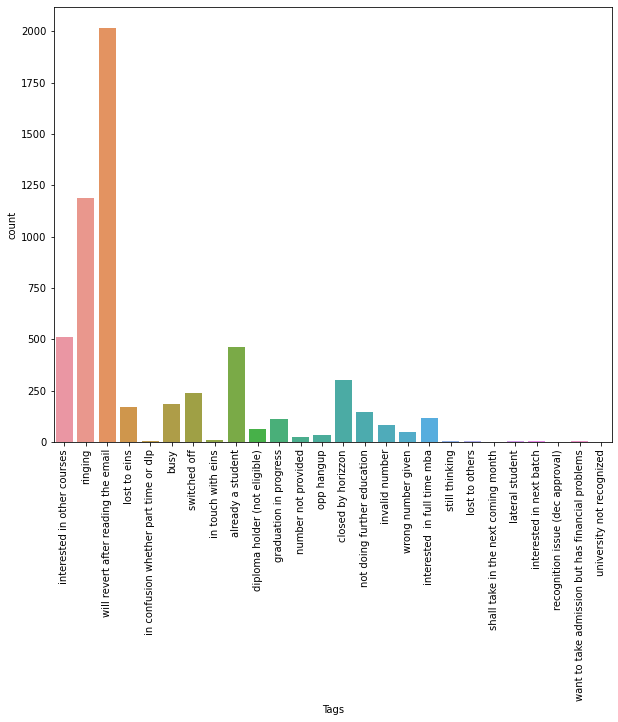

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

- Impute the missing value as 'unknown'.

- Merge the low count data into a category 'others' to avoid categorical labels having skewed values. Replace the values which are having count less than 200.

In [43]:
values_to_replace = lead_df['Tags'].value_counts(dropna=False)[lead_df['Tags'].value_counts(dropna=False)<200].index
values_to_replace

Index(['busy', 'lost to eins', 'not doing further education',
       'interested  in full time mba', 'graduation in progress',
       'invalid number', 'diploma holder (not eligible)', 'wrong number given',
       'opp hangup', 'number not provided', 'in touch with eins',
       'lost to others', 'still thinking',
       'want to take admission but has financial problems',
       'in confusion whether part time or dlp', 'interested in next batch',
       'lateral student', 'university not recognized',
       'shall take in the next coming month',
       'recognition issue (dec approval)'],
      dtype='object')

In [44]:
lead_df['Tags'].fillna('unknown',inplace=True)

lead_df['Tags'].replace(values_to_replace,'others',inplace=True)

In [45]:
# Check whether the values replaced properly
lead_df['Tags'].value_counts(dropna=False)

unknown                                3327
will revert after reading the email    2016
ringing                                1187
others                                 1029
interested in other courses             509
already a student                       465
closed by horizzon                      301
switched off                            240
Name: Tags, dtype: int64

###### Column - 'What is your current occupation'

In [46]:
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5476
NaN                     2683
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

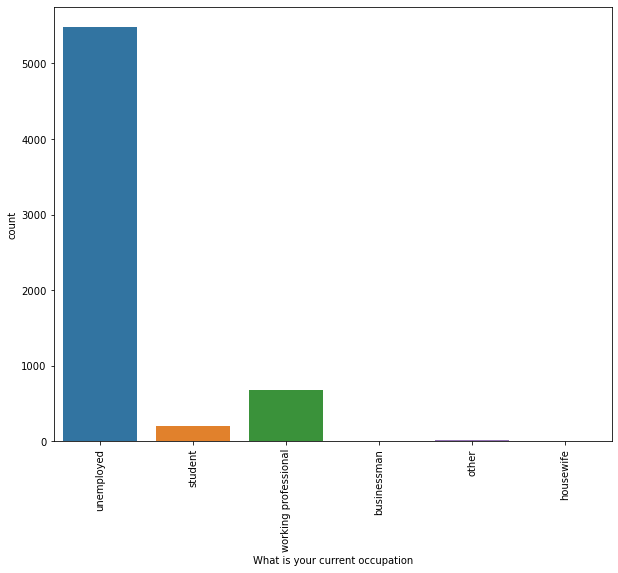

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

Replace the missing values as 'other'

In [48]:
lead_df['What is your current occupation'].fillna('other',inplace=True)

In [49]:
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5476
other                   2698
working professional     677
student                  206
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

We handled the missing values for all columns.

Lets check whether we have missing values in the columns

In [50]:
round(100*lead_df.isnull().sum(axis=0)/len(lead_df),2).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [51]:
# Lets validate the current dataset

lead_df.shape

(9074, 16)

In [52]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

Lets review again the data present in each column.

In [53]:
for col in lead_df.columns:
    print(lead_df[col].value_counts())
    print('===============================================================')

28a71a9f-81bc-4b34-951c-a8f3b02ce3ed    1
b8c53370-50cf-4d8c-a455-4885379761a1    1
cb998f04-8bc4-404a-a547-75f320f98e5a    1
82797615-ccf0-4007-864e-1b37d18b70c2    1
0c54a624-d4b3-493c-b14c-4063dd30245f    1
                                       ..
12b2434c-f3e0-4d23-a54a-39f84deaedd6    1
3cfc6ab5-010c-4ea9-ac49-9715985891c3    1
e6da5e48-fd73-4f9a-ad72-b2cee4e4b24f    1
5ea44303-31c8-4405-8ce1-223a438d35ab    1
e76174f4-6b26-45c3-b34f-882776fee176    1
Name: Prospect ID, Length: 9074, dtype: int64
655360    1
609951    1
619195    1
600768    1
631489    1
         ..
585039    1
648526    1
625995    1
580937    1
608255    1
Name: Lead Number, Length: 9074, dtype: int64
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

#### Observations

- We can drop the columns 'Prospect ID' and 'Lead Number' which are unique IDs for each row.

In [54]:
lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

## 2. EDA

#### Remove the columns which are provided by Sales team

In [55]:
# Columns that are present in the dataframe

lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [56]:
cols_to_remove = ['Last Activity','Tags','Last Notable Activity']

Since we are building the model to predict whether a student is a hot lead or not and the sales team will contact the hot lead profile to nurture to have them enrolled in a program. 

We are using student's data to improve the conversion rate and reducing the time spent by the sales team. So, we need to drop the sales team's data present in the dataset and build the model

In [57]:
lead_df.drop(cols_to_remove,axis=1,inplace=True)

In [58]:
# Balance columns in the dataset
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### Pairplots

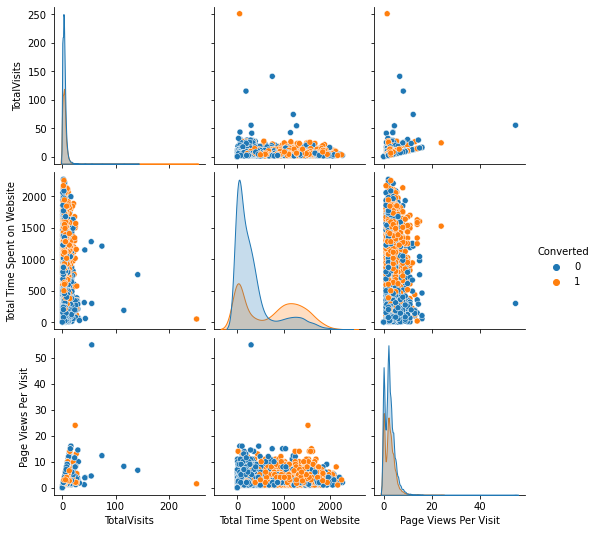

In [59]:
# Pair plots for numerical columns
sns.pairplot(lead_df,hue='Converted')
plt.show()

In [60]:
lead_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


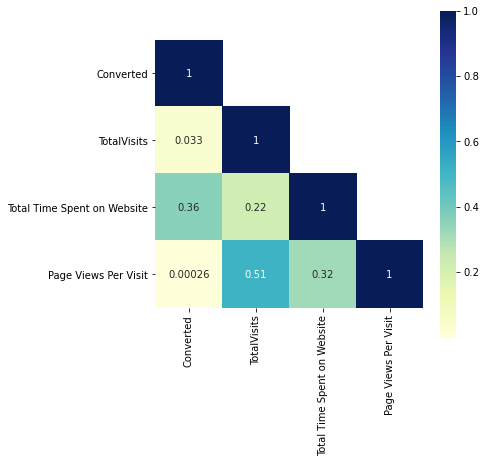

In [61]:
mask= np.array(lead_df.corr())
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(lead_df.corr(),mask=mask, square=True,cmap='YlGnBu',annot=True)
plt.show()

 - There is a strong correlation between the columns 'TotalVisits' and 'Page Views Per Visit'
 - As per the above plot, we could see that the person who is spending more time on the website and high number of visits having more probability of conversion.

#### Univariate and bivariate analysis

Comparing each column with coversion rate

In [62]:
current_cols = lead_df.columns
current_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [63]:
# Numerical columns

num_cols = lead_df.describe().columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

#### Boxplot

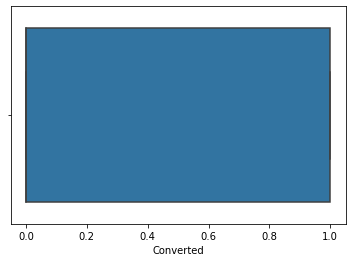

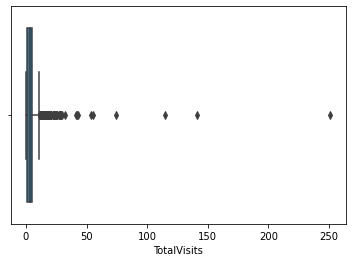

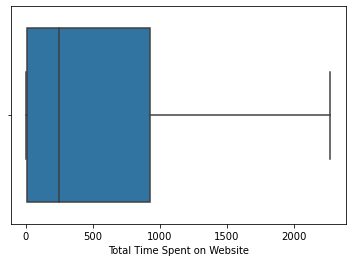

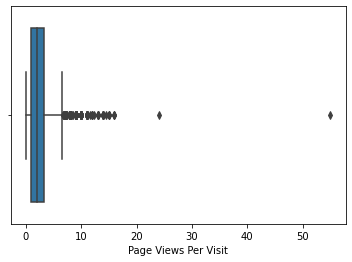

In [64]:
# Creating boxplot for numerical columns
for col in num_cols:
    sns.boxplot(col,data=lead_df)
    plt.show()

#### Obsercations

- The columns 'TotalVisits' and 'Page Views Per Visit' are having outliers.

- Lets validate each column and remove the outliers

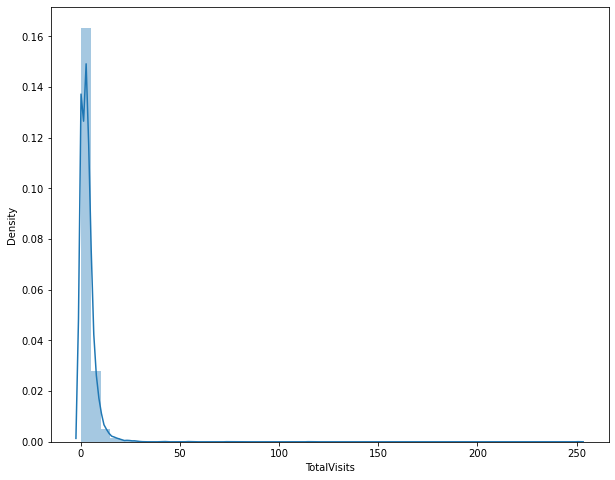

In [65]:
# Column 'TotalVisits'
plt.figure(figsize=(10,8))
sns.distplot(lead_df['TotalVisits'])
plt.show()

In [66]:
lead_df['TotalVisits'].describe(percentiles=[0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
50%         3.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [67]:
# Remove the values which are present beyond 99 percentile
row_to_remove = lead_df[lead_df['TotalVisits'] > lead_df['TotalVisits'].describe(percentiles=[0.99])['99%']].index
row_to_remove

Int64Index([ 345,  469,  663,  767,  896, 1115, 1160, 1283, 1459, 1741, 1824,
            2154, 2190, 2219, 2289, 2322, 2323, 2367, 2420, 2563, 2861, 3093,
            3315, 3376, 3389, 3908, 3984, 4242, 4334, 4471, 4536, 4574, 4686,
            5026, 5078, 5193, 5283, 5349, 5437, 5459, 5514, 5525, 5530, 5538,
            5585, 5608, 5711, 5723, 5746, 5964, 5995, 6047, 6099, 6102, 6182,
            6580, 6700, 6702, 6805, 6990, 7092, 7153, 7332, 7349, 7384, 7421,
            7537, 7547, 7720, 7749, 7862, 7893, 8001, 8179, 8189, 8203, 8230,
            8604, 8619, 8624, 8684, 8827, 9016],
           dtype='int64')

In [68]:
# remove the rows
lead_df.drop(row_to_remove,inplace=True)

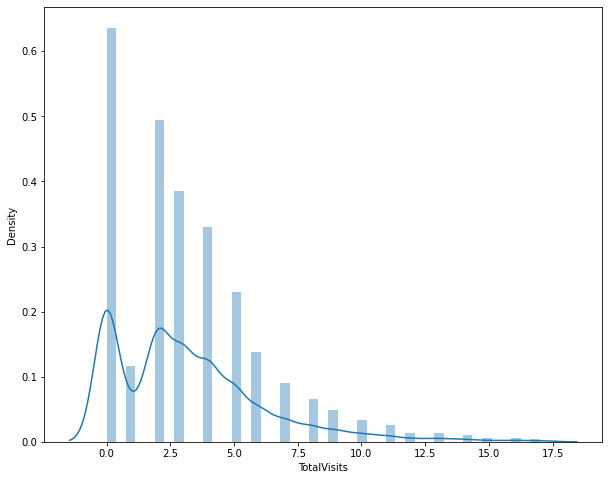

In [69]:
# Lets plot again to validate the column 'TotalVisits'
plt.figure(figsize=(10,8))
sns.distplot(lead_df['TotalVisits'])
plt.show()

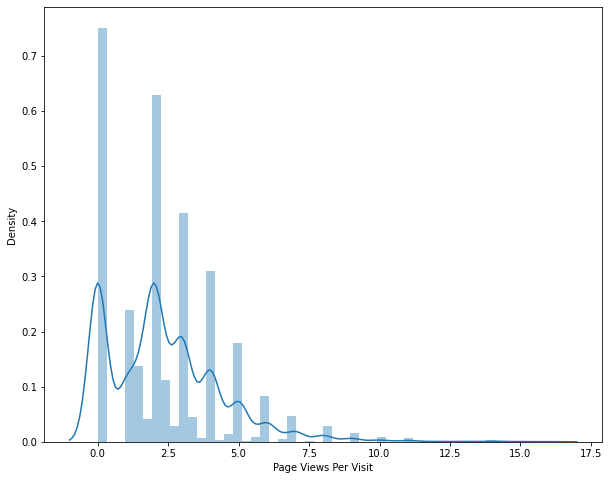

In [70]:
# Column 'Page Views Per Visit'
plt.figure(figsize=(10,8))
sns.distplot(lead_df['Page Views Per Visit'])
plt.show()

In [71]:
lead_df['Page Views Per Visit'].describe(percentiles=[0.95,0.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
50%         2.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [72]:
# Remove the values which are present beyond 99 percentile
row_to_remove = lead_df[lead_df['Page Views Per Visit'] > lead_df['Page Views Per Visit'].describe(percentiles=[0.99])['99%']].index
row_to_remove

Int64Index([  12,   56,  125,  168,  246,  264,  292,  294,  303,  375,  387,
             427,  429,  579,  961,  967,  997, 1345, 1349, 1437, 1517, 1697,
            1812, 1875, 1989, 2237, 2950, 3081, 3214, 3293, 3693, 3971, 4252,
            4518, 5007, 5032, 5164, 5462, 5495, 5531, 5645, 5672, 5868, 5915,
            5998, 6020, 6051, 6300, 6467, 6695, 6790, 6951, 7505, 7590, 7614,
            7662, 7685, 7836, 7853, 8197, 8218, 8281, 8312, 8322, 8381, 8640,
            8953],
           dtype='int64')

In [73]:
# remove the rows
lead_df.drop(row_to_remove,inplace=True)

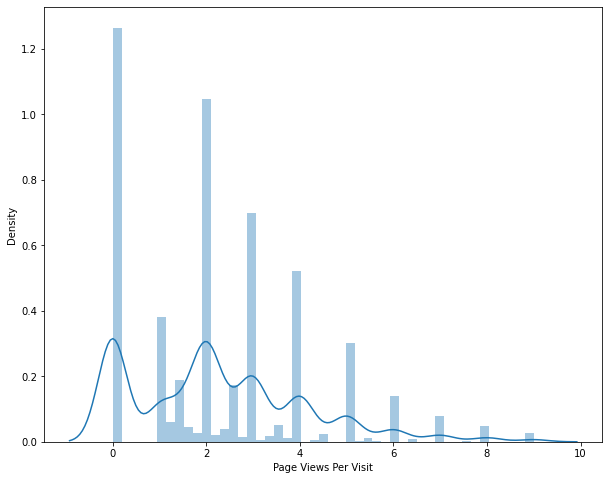

In [74]:
# Lets plot again to validate the column 'Page Views Per Visit'
plt.figure(figsize=(10,8))
sns.distplot(lead_df['Page Views Per Visit'])
plt.show()

In [75]:
# Categorical columns
cat_cols = list(set(lead_df.columns) - set(num_cols))
cat_cols

['Lead Origin',
 'Do Not Email',
 'A free copy of Mastering The Interview',
 'Specialization',
 'City',
 'Lead Source',
 'What is your current occupation']

In [76]:
# Creating a function to plot countplot for each categorical column
def plot_countplot(col,data):
    sns.countplot(x=col,hue='Converted',data=data)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

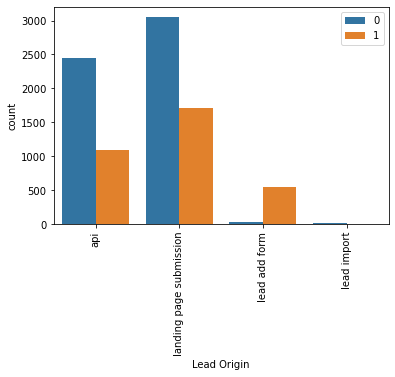

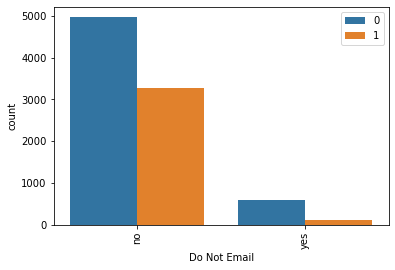

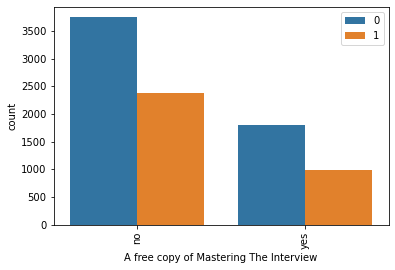

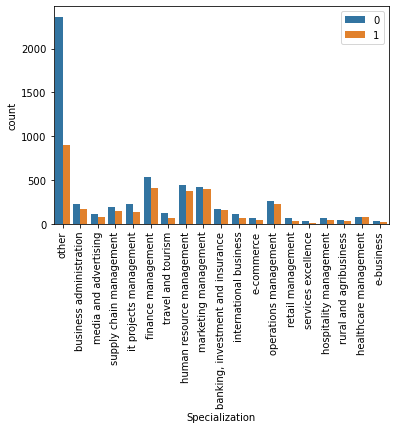

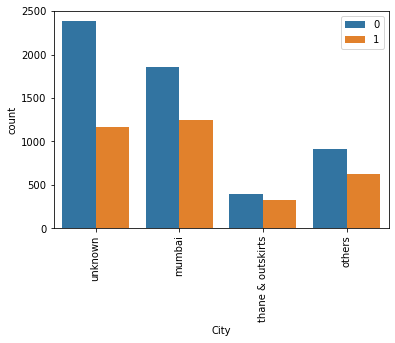

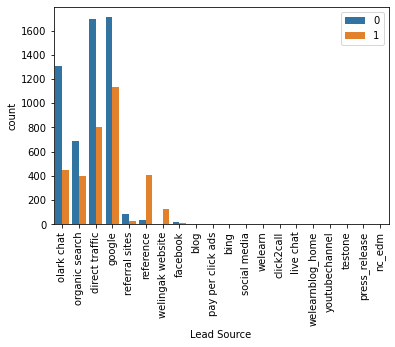

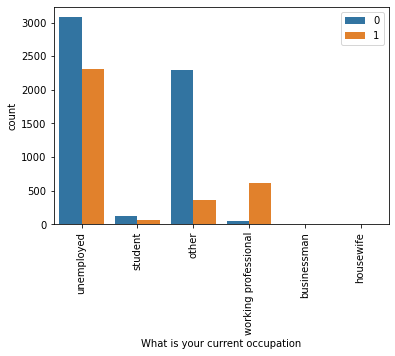

In [77]:
# ploting countplot for each categorical column
for col in cat_cols:
    plot_countplot(col,lead_df)
    print("=======================================================")

#### Observations

- Lead source through google, direct traffic and reference are having higher conversion rate.

- Most of the students not preferred to get the emails.

- Leads who are having specialization as 'finance management', 'human resource management', 'marketing management' and 'operations management' are having higher percentage of conversion rate.

- Working professionals are having higher percentage of conversion. Unemployed leads are having higher count in the conversion.

- Most of the leads are originated from 'API' and 'Landing page submission'

#### Data retained

Rows in the raw dataset - 9240

In [78]:
round(100*(lead_df.shape[0]/9240),2)

96.58

96.58% of data retained after performing the cleaning process.

## 3. Data preparation for modeling

#### Creating dummy variables for the categorical columns

In [79]:
# Categorical columns
cat_cols

['Lead Origin',
 'Do Not Email',
 'A free copy of Mastering The Interview',
 'Specialization',
 'City',
 'Lead Source',
 'What is your current occupation']

###### Columns - 'Do Not Email' and 'A free copy of Mastering The Interview'
- These two columns have the values as 'yes' and 'no'

- So, we can convert them in to binary 1 and 0

In [80]:
lead_df['Do Not Email'].value_counts()

no     8235
yes     689
Name: Do Not Email, dtype: int64

In [81]:
lead_df['A free copy of Mastering The Interview'].value_counts()

no     6126
yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [82]:
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'yes':1,'no':0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'yes':1,'no':0})

In [83]:
# Categorical columns
cat_cols = list(set(lead_df.columns) - set(lead_df.describe().columns))
cat_cols

['Lead Origin',
 'Specialization',
 'City',
 'Lead Source',
 'What is your current occupation']

In [84]:
df_dummies = pd.get_dummies(lead_df[cat_cols])
df_dummies.head()

,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,City_unknown,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


###### Adding dummy variables to the dataframe

In [85]:
lead_df = pd.concat([lead_df,df_dummies],axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,City_unknown,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,api,olark chat,0,0,0.0,0,0.0,other,unemployed,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,api,organic search,0,0,5.0,674,2.5,other,unemployed,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,business administration,student,mumbai,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,media and advertising,unemployed,mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,landing page submission,google,0,1,2.0,1428,1.0,other,unemployed,mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [86]:
lead_df.shape

(8924, 64)

After concatenation, there are 108 variables in the dataframe. Now we can drop the original categorical columns.

In [87]:
lead_df.drop(cat_cols,axis=1,inplace=True)

In [88]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8924 non-null   int64  
 1   Converted                                             8924 non-null   int64  
 2   TotalVisits                                           8924 non-null   float64
 3   Total Time Spent on Website                           8924 non-null   int64  
 4   Page Views Per Visit                                  8924 non-null   float64
 5   A free copy of Mastering The Interview                8924 non-null   int64  
 6   Lead Origin_api                                       8924 non-null   uint8  
 7   Lead Origin_landing page submission                   8924 non-null   uint8  
 8   Lead Origin_lead add form                             8924

Now we have 59 vaiables in the dataframe and we can use these variables to build the model

#### Train-Test spit

In [89]:
# Creating input variables

x = lead_df.drop('Converted',axis=1)

In [90]:
# Creating output/y variable

y = lead_df['Converted']

In [91]:
# Split the dataset into 70% and 30% for train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [92]:
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,City_unknown,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
6676,0,3.0,1247,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6138,0,4.0,816,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8650,0,3.0,1128,3.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3423,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6552,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Scaling

- Change the scale of the columns 'TotalVisits','Total Time Spent on Website'and 'Page Views Per Visit' using the "MinMaxScaler"

In [93]:
scaler = MinMaxScaler()

In [94]:
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_api,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,City_unknown,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
6676,0,0.176471,0.548856,0.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6138,0,0.235294,0.359155,0.444444,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8650,0,0.176471,0.496479,0.333333,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3423,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6552,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


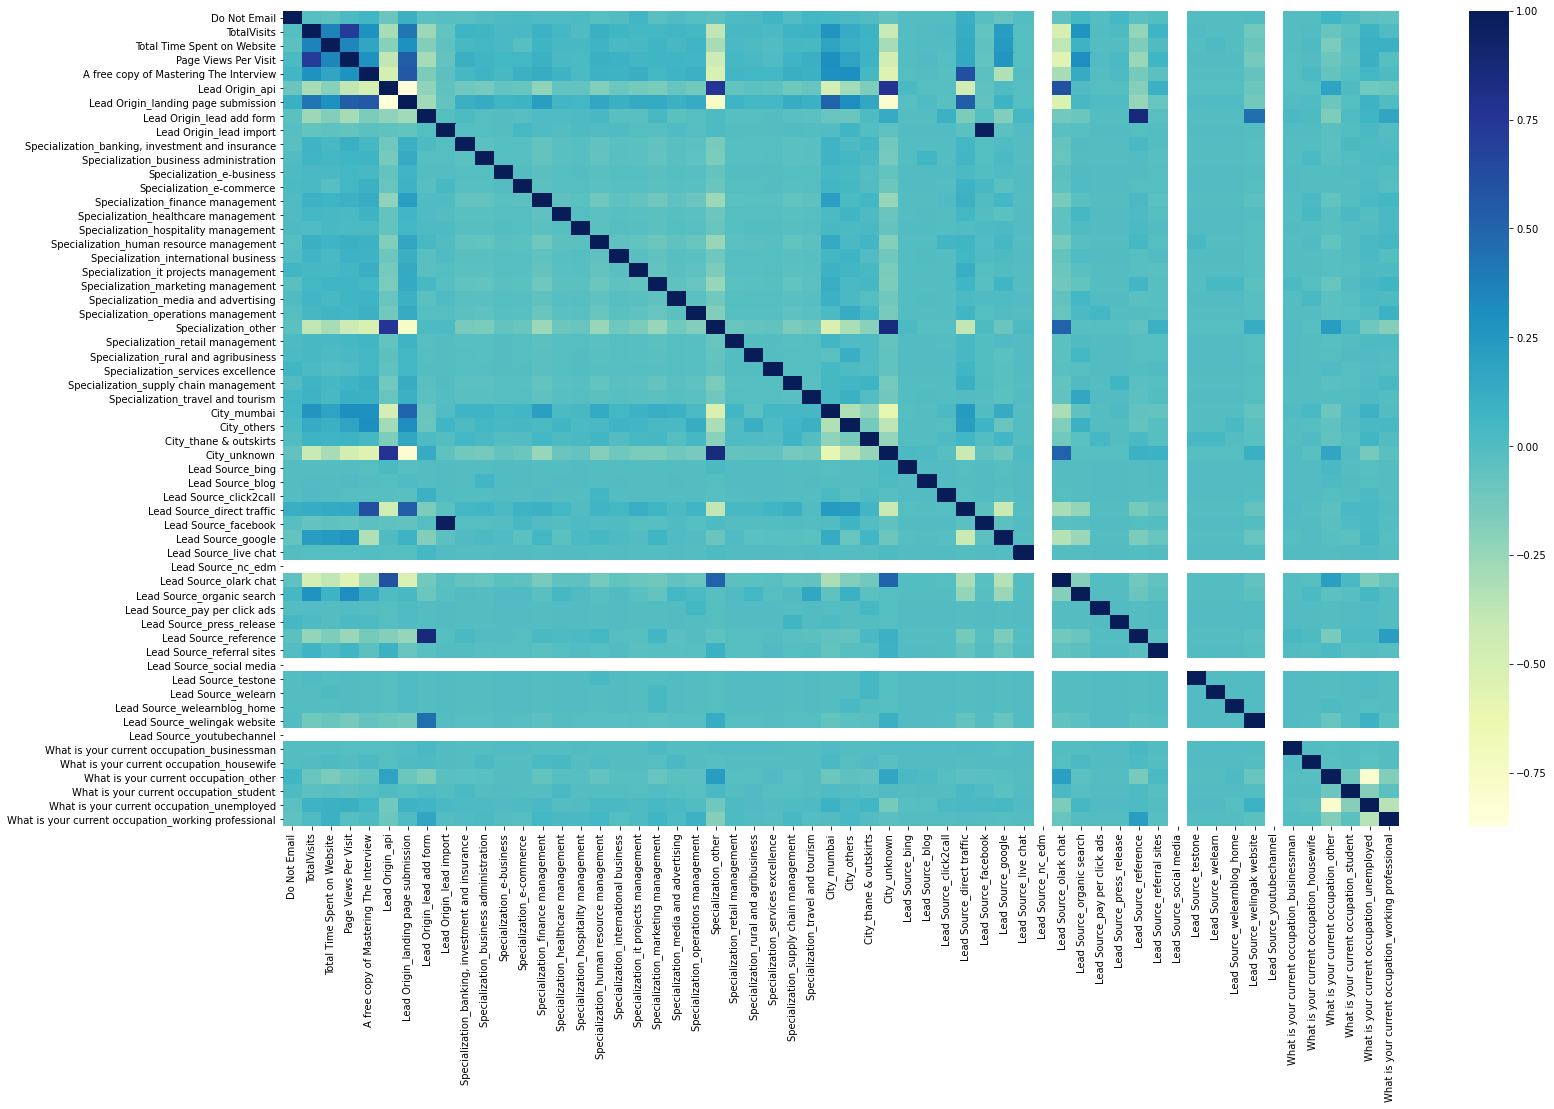

In [95]:
# Lets create a headmap for viewing the correlation between the variables in x_train dataframe

plt.figure(figsize=(25,15))
sns.heatmap(x_train.corr(),cmap='YlGnBu')
plt.show()

We could see that some columns are highly correlated between them. Lets validate the correlation between them.

In [96]:
# Top 16 features with high correlation between them.
corr_data = x_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_data.head(15)

Do Not Email                                Do Not Email                              1.000000
Lead Source_facebook                        Lead Origin_lead import                   0.977941
Lead Origin_landing page submission         Lead Origin_api                           0.872709
Lead Origin_lead add form                   Lead Source_reference                     0.869362
Specialization_other                        City_unknown                              0.854058
Lead Origin_landing page submission         City_unknown                              0.817434
What is your current occupation_unemployed  What is your current occupation_other     0.805482
Lead Origin_api                             City_unknown                              0.771924
                                            Specialization_other                      0.761108
Lead Origin_landing page submission         Specialization_other                      0.756399
Page Views Per Visit                        TotalV

#### Dropping highly correlated variables

Lets remove the features which are having correlation more than 0.85 to reduce the multicollinearity

In [97]:
dropping_cols = ['Lead Origin_lead import','Lead Origin_landing page submission','Lead Source_reference',
                 'City_unknown']

In [98]:
# Dropping columns on training dataset
x_train.drop(dropping_cols,axis=1,inplace=True)

In [99]:
# Dropping columns on test dataset
x_test.drop(dropping_cols,axis=1,inplace=True)

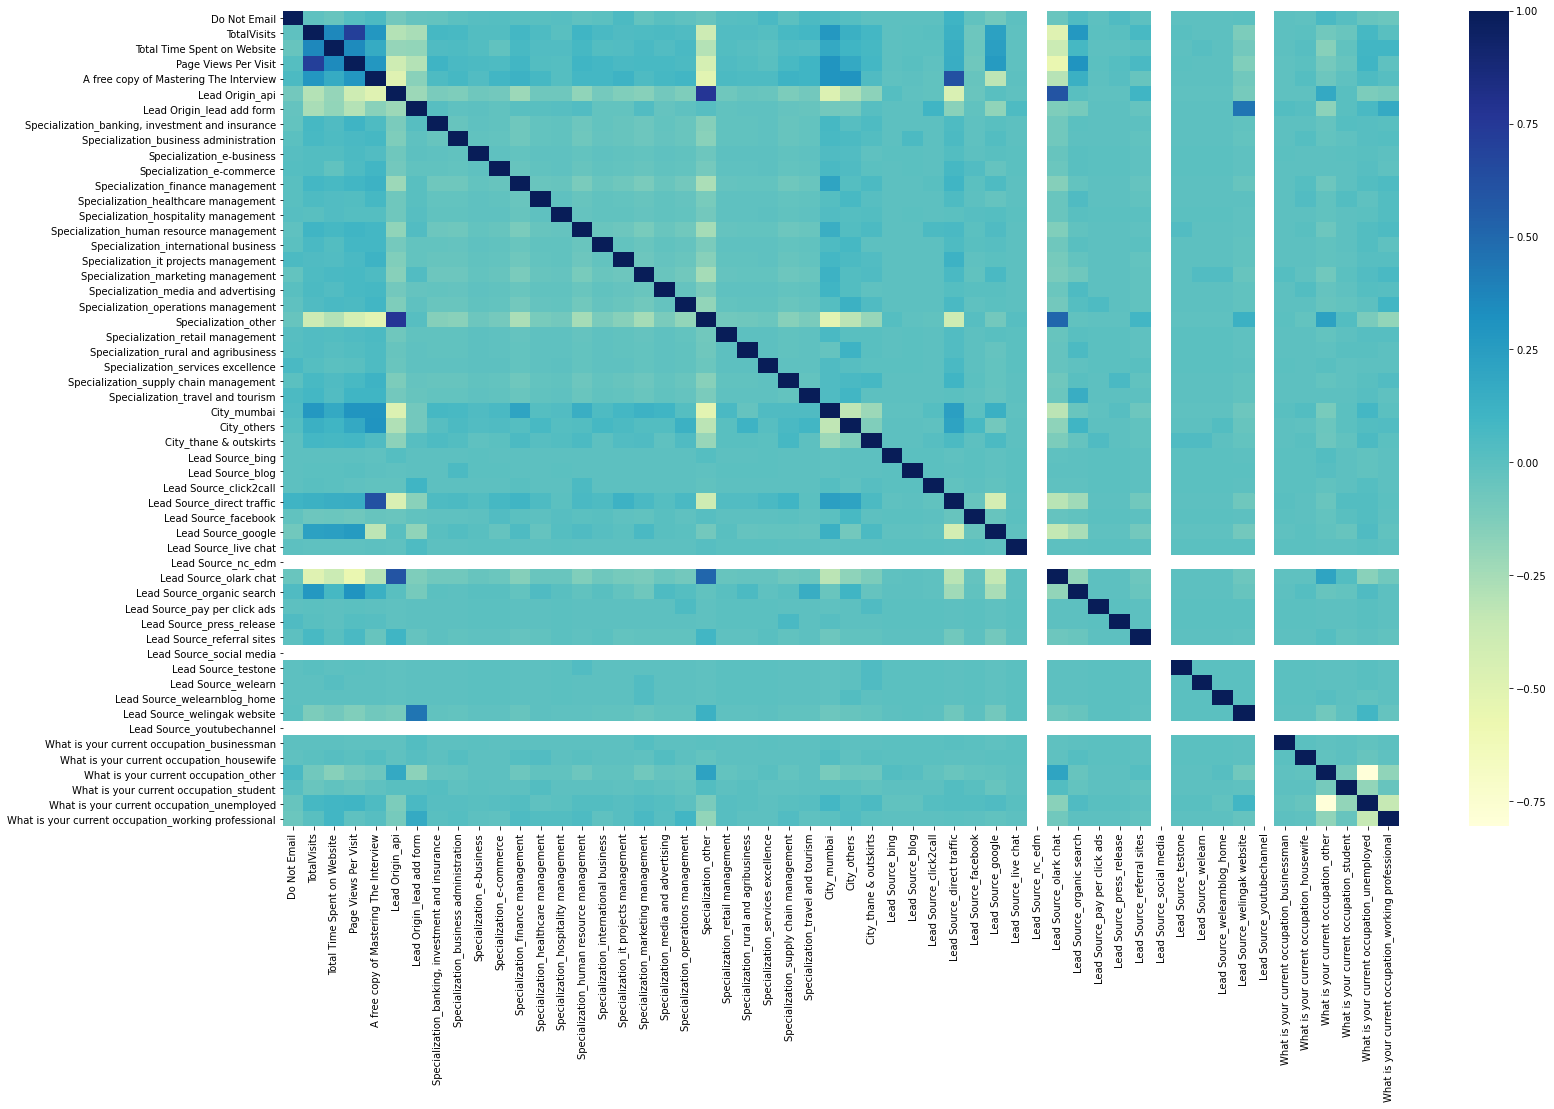

In [100]:
plt.figure(figsize=(25,15))
sns.heatmap(x_train.corr(),cmap='YlGnBu')
plt.show()

Lets perform RFE to reduce the features and find the important features

## 4.Model building

Using the LogisticRegression method to build the model.

We use mix approach to reduce the features.

- Perform RFE to reduce the features to 20
- Manual validation to reduce the feature from 20 using p-values and VIF values.

In [101]:
log_reg = LogisticRegression()

In [102]:
# Running RFE to get the 20 variable

rfe= RFE(log_reg,20)
rfe = rfe.fit(x_train, y_train)

In [103]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_api', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Specialization_banking, investment and insurance', False, 3),
 ('Specialization_business administration', False, 29),
 ('Specialization_e-business', False, 30),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 31),
 ('Specialization_healthcare management', False, 28),
 ('Specialization_hospitality management', True, 1),
 ('Specialization_human resource management', False, 22),
 ('Specialization_international business', False, 27),
 ('Specialization_it projects management', False, 11),
 ('Specialization_marketing management', False, 19),
 ('Specialization_media and advertising', False, 21),
 ('Specialization_operations management', False, 20),
 ('Specialization_other', True, 1),
 ('Speci

In [104]:
selected_col = x_train.columns[rfe.support_]
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Specialization_retail management', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_testone', 'Lead Source_welingak website',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_working professional'],
      dtype='object')

#### Assessing the model with statsmodels with the selected columns

#### Model 1

In [105]:
# Creating a function to build logistic regression model with the selected columns

def create_sm_model(selected_col):
    x_train_sm = sm.add_constant(x_train[selected_col]) # Adding constant variable for statsmodel
    logreg2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
    res = logreg2.fit()
    print(res.summary())
    return res

In [106]:
model1 = create_sm_model(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2776.8
Date:                Wed, 12 Jan 2022   Deviance:                       5553.5
Time:                        23:39:57   Pearson chi2:                 6.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Calculating VIF

In [107]:
def vif_calculation(selected_col):
    vif = pd.DataFrame()
    vif['Features'] = x_train[selected_col].columns
    vif['VIF'] = [round(variance_inflation_factor(x_train[selected_col].values,i),2) for i in range(x_train[selected_col].shape[1])]
    vif = vif.sort_values(by='VIF',ascending=False)
    print(vif)

In [108]:
vif_calculation(selected_col)

                                             Features   VIF
3                                Page Views Per Visit  6.49
1                                         TotalVisits  4.89
7                                Specialization_other  4.76
4                                     Lead Origin_api  4.73
11                                 Lead Source_google  3.54
10                         Lead Source_direct traffic  2.81
12                         Lead Source_organic search  2.39
2                         Total Time Spent on Website  2.35
17              What is your current occupation_other  1.53
5                           Lead Origin_lead add form  1.48
15                       Lead Source_welingak website  1.35
19  What is your current occupation_working profes...  1.20
13                         Lead Source_referral sites  1.16
0                                        Do Not Email  1.12
18            What is your current occupation_student  1.04
9                              Lead Sour

Feature "Lead Source_testone" which is having a decent VIF value but, p-value 1 (very high).
So, we can remove this column and build the model again.

In [109]:
selected_col = selected_col.drop('Lead Source_testone')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Specialization_retail management', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_working professional'],
      dtype='object')

#### Model 2

In [110]:
model2 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.5
Date:                Wed, 12 Jan 2022   Deviance:                       5555.1
Time:                        23:39:57   Pearson chi2:                 6.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Lets remove the feature 'What is your current occupation_housewife' which is having very high p-value nearly 1.

#### Model 3

In [111]:
selected_col = selected_col.drop('What is your current occupation_housewife')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Specialization_retail management', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_working professional'],
      dtype='object')

In [112]:
model3 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.2
Date:                Wed, 12 Jan 2022   Deviance:                       5562.4
Time:                        23:39:57   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Feature 'Page Views Per Visit' is having VIF value as 6.49. So, we can remove this feature and build the model again.

#### Model 4

In [113]:
selected_col = selected_col.drop('Page Views Per Visit')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Specialization_retail management', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_working professional'],
      dtype='object')

In [114]:
model4 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.5
Date:                Wed, 12 Jan 2022   Deviance:                       5571.0
Time:                        23:39:57   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Lets remove the feature 'What is your current occupation_student' which is having the high p-value.

#### Model 5

In [115]:
selected_col = selected_col.drop('What is your current occupation_student')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Specialization_retail management', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'What is your current occupation_other',
       'What is your current occupation_working professional'],
      dtype='object')

In [116]:
model5 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.7
Date:                Wed, 12 Jan 2022   Deviance:                       5573.4
Time:                        23:39:58   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Feature 'Specialization_retail management' is having the p-value as 0.103. So, we can remvoe this feature and build the model

#### Model 6

In [117]:
selected_col = selected_col.drop('Specialization_retail management')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'What is your current occupation_other',
       'What is your current occupation_working professional'],
      dtype='object')

In [118]:
model6 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.1
Date:                Wed, 12 Jan 2022   Deviance:                       5576.2
Time:                        23:39:58   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Feature 'Lead Source_click2call' is having p-value as 0.092. So, we can remove this feature and build the model again.

#### Model 7

In [119]:
selected_col = selected_col.drop('Lead Source_click2call')
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'What is your current occupation_other',
       'What is your current occupation_working professional'],
      dtype='object')

In [120]:
model7 = create_sm_model(selected_col)
vif_calculation(selected_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.2
Date:                Wed, 12 Jan 2022   Deviance:                       5578.3
Time:                        23:39:58   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now we could see that all features are having VIF value less than 5 and the p-values are less than 0.05.

We can use model7 as final model to calculate the various metrics.

In [121]:
final_model = model7

In [122]:
# Columns used in the final model
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_api', 'Lead Origin_lead add form',
       'Specialization_hospitality management', 'Specialization_other',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'What is your current occupation_other',
       'What is your current occupation_working professional'],
      dtype='object')

## 5. Predict and calculate the accuracy on training data

In [123]:
# Predict the y values with the final model and using the features used in the final model

x_train_sm = sm.add_constant(x_train[selected_col])
y_pred = final_model.predict(x_train_sm)
y_pred.head(10)

6676    0.635730
6138    0.519422
8650    0.935709
3423    0.107027
6552    0.107027
1696    0.157715
2110    0.795366
6830    0.071347
2581    0.477836
5927    0.108465
dtype: float64

In [124]:
# Reshape the predicted probability to merge and compare with the actual y values
y_pred = y_pred.values.reshape(-1)

In [125]:
# Creating dataframe with the predicted probabilities
y_train_pred = pd.DataFrame({"Converted":y_train.values,"Predicted_prob":y_pred})
y_train_pred.head(10)

,Converted,Predicted_prob
0,1,0.635730
1,1,0.519422
2,1,0.935709
3,0,0.107027
4,0,0.107027
5,1,0.157715
6,1,0.795366
7,0,0.071347
8,0,0.477836
9,0,0.108465


In [126]:
# Calculate predicted value with the cut_off value 0.5
y_train_pred['Predicted'] = y_train_pred['Predicted_prob'].map(lambda x: 1 if x>0.5 else 0)


In [127]:
y_train_pred.head(10)

,Converted,Predicted_prob,Predicted
0,1,0.635730,1
1,1,0.519422,1
2,1,0.935709,1
3,0,0.107027,0
4,0,0.107027,0
5,1,0.157715,0
6,1,0.795366,1
7,0,0.071347,0
8,0,0.477836,0
9,0,0.108465,0


##### Checking overall accuracy

In [128]:
print(metrics.accuracy_score(y_train_pred['Converted'],y_train_pred['Predicted'])*100)

79.7950688440602


##### Sensitivity and specificity

In [129]:
# Calculate the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred['Converted'],y_train_pred['Predicted'])
confusion

array([[3448,  423],
       [ 839, 1536]], dtype=int64)

In [130]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [131]:
# Sensitivity

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

print(' Sensitivity: ',sensitivity, '\n','Specificity: ',specificity)

 Sensitivity:  0.6467368421052632 
 Specificity:  0.8907259106174116


In [132]:
# Calculate false positive rate - predicting churn when customer does not have churned

FPR = FP/float(FP+TN)
FPR

0.10927408938258848

In [133]:
# Positive predictive value

TP / float(TP+FP)

0.7840735068912711

In [134]:
# Negative predictive values

TN / float(TN+FN)

0.8042920457196174

#### ROC curve

In [135]:
def draw_roc(actual, probs):
    
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score( actual, probs)
    
    plt.figure(figsize = (10,8))
    
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score) # Ploting ROC curve
    
    plt.plot([0,1],[0,1],'k--') # Diagonal line
    
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

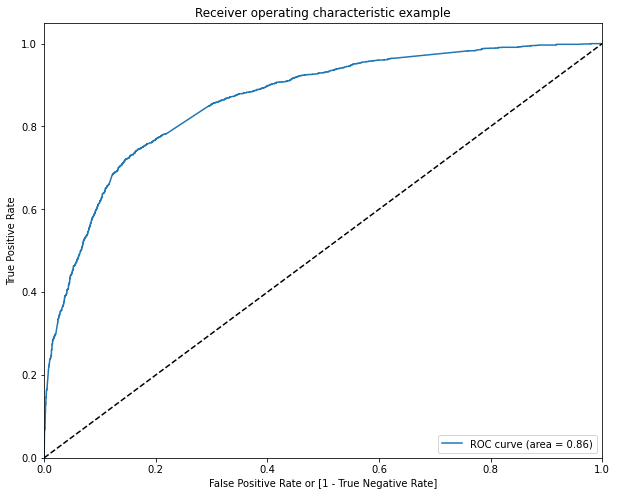

In [136]:
fpr, tpr, thresholds = draw_roc(y_train_pred['Converted'],y_train_pred['Predicted_prob'])

ROC curve area 0.86 is decent score.

In [137]:
thresholds.max()

1.999676436497841

#### Finding the optimal cutoff point

Optimal cutoff probability is that value where we get the balanced sensitivity and specificity

In [138]:
# Creating columns with different probability cutoffs

numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred[i] = y_train_pred["Predicted_prob"].map(lambda x:1 if x>i else 0)

In [139]:
y_train_pred.head()

,Converted,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.635730,1,1,1,1,1,1,1,1,0,0,0
1,1,0.519422,1,1,1,1,1,1,1,0,0,0,0
2,1,0.935709,1,1,1,1,1,1,1,1,1,1,1
3,0,0.107027,0,1,1,0,0,0,0,0,0,0,0
4,0,0.107027,0,1,1,0,0,0,0,0,0,0,0


In [140]:
# Calculating the confusion matrix with different cutoff values

cutoff_df =  pd.DataFrame(columns = ['Prob','accuracy','Sensitivity','Specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred['Converted'],y_train_pred[i])
    
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]

In [141]:
print(cutoff_df)

     Prob  accuracy  Sensitivity  Specificity
0.0   0.0  0.380243     1.000000     0.000000
0.1   0.1  0.520653     0.982737     0.237148
0.2   0.2  0.700128     0.907789     0.572720
0.3   0.3  0.786583     0.773895     0.794368
0.4   0.4  0.803394     0.719579     0.854818
0.5   0.5  0.797951     0.646737     0.890726
0.6   0.6  0.785142     0.573053     0.915267
0.7   0.7  0.763369     0.472000     0.942134
0.8   0.8  0.736311     0.358316     0.968225
0.9   0.9  0.704291     0.240842     0.988633


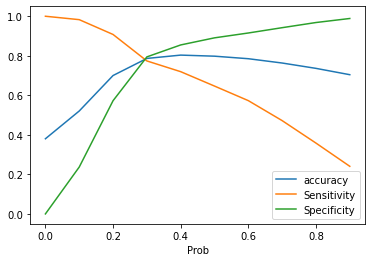

In [142]:
# Plot curves for accuracy, sensitivity and specificity for each probability value

cutoff_df.plot.line(x='Prob',y=['accuracy','Sensitivity','Specificity'])

plt.show()

###### From the curve above, we can see that the cutoff point will be around 0.3. So, we can take cutoff point as 0.3 for our predictions

In [143]:
# Calculating the predicated values again with the cutoff 0.3

# Adding constant for model building
x_train_sm = sm.add_constant(x_train[selected_col]) 

# Make prediction using the final model
y_train_pred = final_model.predict(x_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)

# Storing the predicted probability and actual y values in a dataframe
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Predicted_prob":y_train_pred})

# Convert the y values based on the cutoff 0.3 from the predicted probability
y_train_pred_final['Predicted'] = y_train_pred_final['Predicted_prob'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head(10)

,Converted,Predicted_prob,Predicted
0,1,0.635730,1
1,1,0.519422,1
2,1,0.935709,1
3,0,0.107027,0
4,0,0.107027,0
5,1,0.157715,0
6,1,0.795366,1
7,0,0.071347,0
8,0,0.477836,1
9,0,0.108465,0


In [144]:
# Lets check the accuracy again

accuracy = metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])*100
print(accuracy)

78.65834133845662


In [145]:
# Calculate the confusion matrix again for the new predicted values

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
confusion

array([[3075,  796],
       [ 537, 1838]], dtype=int64)

In [146]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [147]:
TPR = sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
FPR = FP/float(FP+TN)

print('Accuracy: ',accuracy,'\nSpecificity: ',specificity,'\nTPR/sensitivity:',TPR,'\nFPR: ',FPR)

Accuracy:  78.65834133845662 
Specificity:  0.7943683802634978 
TPR/sensitivity: 0.7738947368421053 
FPR:  0.2056316197365022


Cutoff point 0.3 is having decent scores

In [148]:
thresholds.max()

1.999676436497841

## 6. Make predictions with test data

In [149]:
x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_api,Lead Origin_lead add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
7625,0,2.0,1621,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5207,0,4.0,887,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2390,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4362,0,2.0,232,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1023,0,15.0,317,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [150]:
# Scaling the dataset as per the training dataset

x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_api,Lead Origin_lead add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,City_mumbai,City_others,City_thane & outskirts,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
7625,0,0.117647,0.713468,0.222222,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5207,0,0.235294,0.390405,0.444444,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2390,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4362,0,0.117647,0.102113,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1023,0,0.882353,0.139525,0.555556,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [151]:
# Adding constant to the test data with the selected columns which are used to train the model

x_test_sm = sm.add_constant(x_test[selected_col])

In [152]:
# Make prediction using the final model

y_test_pred = final_model.predict(x_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred = pd.DataFrame({"Converted":y_test.values,"Predicted_prob":y_test_pred})
y_test_pred.head()

,Converted,Predicted_prob
0,0,0.776034
1,1,0.474753
2,1,0.833829
3,0,0.231068
4,0,0.356646


In [153]:
# Calculating output with the predicted probability (Cutoff = 0.3)

y_test_pred['Predicted'] = y_test_pred['Predicted_prob'].map(lambda x: 1 if x>0.3 else 0)
y_test_pred.head()

,Converted,Predicted_prob,Predicted
0,0,0.776034,1
1,1,0.474753,1
2,1,0.833829,1
3,0,0.231068,0
4,0,0.356646,1


#### Calculate various metrics for predictions using test dataset

In [154]:
# Accuracy

accuracy = metrics.accuracy_score(y_test_pred['Converted'],y_test_pred['Predicted'])
accuracy

0.7901418969380134

In [155]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_test_pred['Converted'],y_test_pred['Predicted'])
confusion

array([[1342,  342],
       [ 220,  774]], dtype=int64)

In [156]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [157]:
TPR = sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
FPR = FP/float(FP+TN)

print('Accuracy: ',accuracy,'\nSpecificity: ',specificity,'\nTPR/sensitivity:',TPR,'\nFPR: ',FPR)

Accuracy:  0.7901418969380134 
Specificity:  0.7969121140142518 
TPR/sensitivity: 0.778672032193159 
FPR:  0.20308788598574823


##### On test dataset predictions also, we have decent scores with the cutoff 0.3.

### Precision and Recall

Select the cutoff value using precision and recall

In [158]:
# Confusion matrix using training dataset

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
confusion

array([[3075,  796],
       [ 537, 1838]], dtype=int64)

In [159]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [160]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print('Precision: ',precision,'\nRecall: ',recall)

Precision:  0.6977980258162491 
Recall:  0.7738947368421053


On the predictions made using the training dataset with the cutoff value 0.3, we have precision as around 70% and the recall as around 77% 

##### Precision and recall tradeoff

In [161]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'],y_train_pred_final['Predicted_prob'])

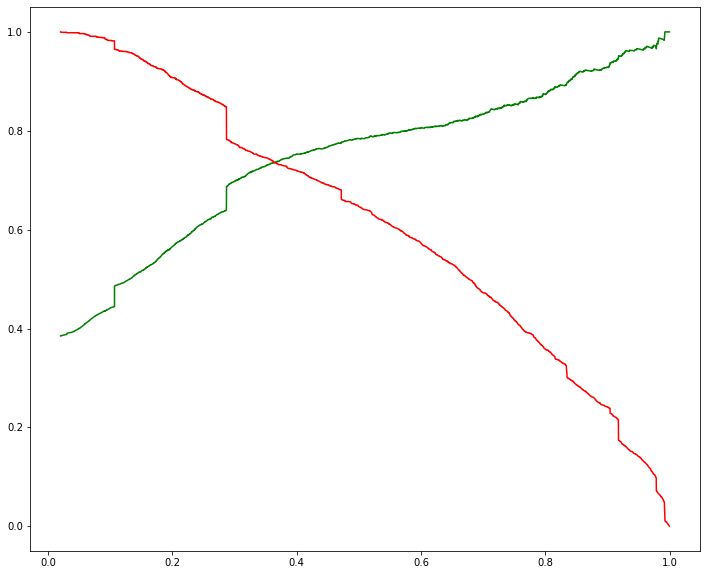

In [162]:
# Plotting curves for precision and recall

plt.figure(figsize = (12,10))
plt.plot(thresholds, precision[:-1], "g-") # precision will be having n-threshol+1 values (last value will be 1)
plt.plot(thresholds, recall[:-1], "r-") # recall will be having n-threshol+1 values (last value will be 0)
plt.show()

As per the above plot, we could see that the cutoff value is near 0.36. So, we can calculate the predictions with this cutoff value.

In [163]:
y_train_pred_final['final_Predicted'] = y_train_pred_final['Predicted_prob'].map(lambda x: 1 if x>0.36 else 0)
y_train_pred_final.head()

,Converted,Predicted_prob,Predicted,final_Predicted
0,1,0.635730,1,1
1,1,0.519422,1,1
2,1,0.935709,1,1
3,0,0.107027,0,0
4,0,0.107027,0,0


In [164]:
# Calculate various metrics scores - Training dataset

# Accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['final_Predicted'])*100

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_Predicted'])

TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

precision = 100* TP / (TP + FP)
recall = 100* TP / (TP + FN)

print('Accuracy: ',accuracy,'\nPrecision: ',precision,'\nRecall: ',recall)

Accuracy:  79.93916106308036 
Precision:  73.43358395989975 
Recall:  74.02105263157895


With cutoff 0.36, we have precision and recall values around 74%.

#### Calculate the prediction with the predicted probability (on test dataset) as per the cutoff value 0.36

In [165]:
y_test_pred['final_Predicted'] = y_test_pred['Predicted_prob'].map(lambda x: 1 if x > 0.36 else 0)

In [166]:
y_test_pred.head()

,Converted,Predicted_prob,Predicted,final_Predicted
0,0,0.776034,1,1
1,1,0.474753,1,1
2,1,0.833829,1,1
3,0,0.231068,0,0
4,0,0.356646,1,0


In [167]:
# Calculate various metrics scores - Test dataset

# Accuracy
accuracy = metrics.accuracy_score(y_test_pred['Converted'],y_test_pred['final_Predicted'])*100

# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred['Converted'],y_test_pred['final_Predicted'])

TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

precision = 100*TP / (TP + FP)
recall = 100* TP / (TP + FN)

print('Accuracy: ',accuracy,'\nPrecision: ',precision,'\nRecall: ',recall)

Accuracy:  80.54518297236743 
Precision:  73.25467059980335 
Recall:  74.9496981891348


On the prediction values based on test dataset with cutoff 0.36, we have precision around 73% and recall value around 75%.

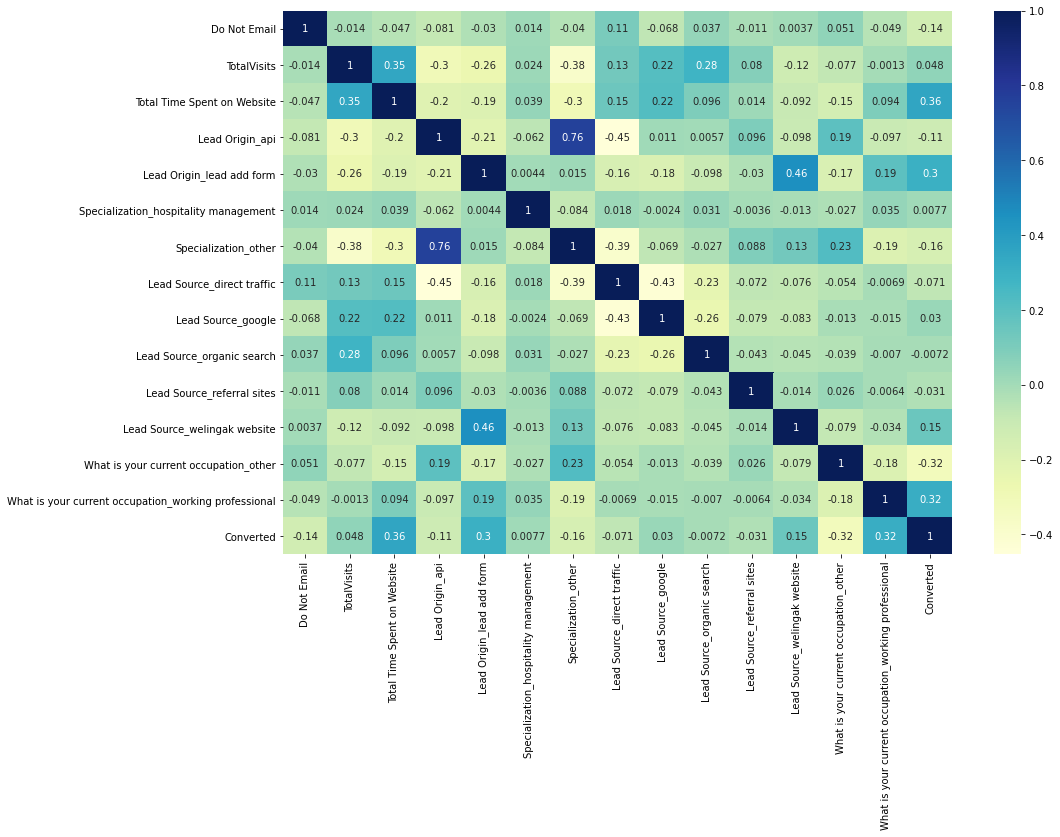

In [168]:
# Correlations between the final selected columns and converted column.

col_list = list(selected_col)
col_list.extend(['Converted'])

plt.figure(figsize=(15,10))
sns.heatmap(lead_df[col_list].corr(),cmap='YlGnBu',annot=True)
plt.show()

In [169]:
# Each features correlation with the target column 'Converted'
lead_df[col_list].corr()['Converted'].sort_values()

What is your current occupation_other                  -0.320889
Specialization_other                                   -0.160067
Do Not Email                                           -0.138660
Lead Origin_api                                        -0.112752
Lead Source_direct traffic                             -0.071263
Lead Source_referral sites                             -0.030828
Lead Source_organic search                             -0.007232
Specialization_hospitality management                   0.007657
Lead Source_google                                      0.029506
TotalVisits                                             0.048199
Lead Source_welingak website                            0.151640
Lead Origin_lead add form                               0.303851
What is your current occupation_working professional    0.315954
Total Time Spent on Website                             0.356875
Converted                                               1.000000
Name: Converted, dtype: f

## Conclusion

With the above model, we can find that the below features are most useful to predict the hot leads.

- The total time spent on website and the total visits.
- When the lead source is 'welingak website' and 'google'.
- Lead origin is 'lead add form'
- Leads who are working professionals.